In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_table(r'XYZCorp_LendingData.txt')
pd.set_option('display.max_columns', None)
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
data.shape

(855969, 73)

In [4]:
#droping unimportant columns(which have only one unique value,dates,addresses,zipcodes...etc)
data=data.drop(['pymnt_plan','policy_code','next_pymnt_d','title','emp_title','earliest_cr_line','zip_code','last_pymnt_d','last_credit_pull_d','id','issue_d'],axis=1)

In [5]:
data.shape

(855969, 62)

In [6]:
#deleting columns having more than 40% null val
l=data.isnull().sum()
for i in range(len(l)):
    if l[i]>342387:
        del data[(l.index[i])]

In [7]:
data.shape

(855969, 41)

In [8]:
data.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv             

In [9]:
data.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [10]:
#filling null value columns which have less than 40% nullvalues
data.revol_util=data.revol_util.fillna(data.revol_util.mean())
data.emp_length=data.emp_length.fillna('5 years')#calculated mean and rounded value i.e 5
data.tot_coll_amt=data.tot_coll_amt.fillna(data.tot_coll_amt.mean())
data.tot_cur_bal=data.tot_cur_bal.fillna(data.tot_cur_bal.mean())
data.total_rev_hi_lim=data.total_rev_hi_lim.fillna(data.total_rev_hi_lim.mean())
data.collections_12_mths_ex_med=data.collections_12_mths_ex_med.fillna(data.collections_12_mths_ex_med.mean())

In [11]:
#making sure no column left untreated
data.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

In [12]:
#for conversion of dtypes creating all string value column names
catd = list(data.select_dtypes(include=['object']).columns)
catd

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

In [13]:
#dtype convertion
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#*******************************************************************************#
data.emp_length =le.fit_transform(data.emp_length)
data.term =le.fit_transform(data.term)
data.grade =le.fit_transform(data.grade)
data.sub_grade =le.fit_transform(data.sub_grade)
data.home_ownership =le.fit_transform(data.home_ownership)
data.verification_status =le.fit_transform(data.verification_status)
data.purpose =le.fit_transform(data.purpose)
data.addr_state =le.fit_transform(data.addr_state)
data.initial_list_status =le.fit_transform(data.initial_list_status)
data.application_type  =le.fit_transform(data.application_type )

In [14]:
#making sure no column left untreated
data.dtypes

member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
purpose                         int32
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt 

# DATA SAMPLING
now the data is cleaned next process is to sample data into test and train

In [15]:
data.shape

(855969, 41)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#considered 0.08 for test because after class imbalance treatment(i.e undersampling)of  train y,test values became more than train if i consider anything more than 0.08
trainn,test=train_test_split(data,test_size=0.08,random_state=100)

In [18]:
trainn.shape,test.shape

((787491, 41), (68478, 41))

In [19]:
xx=trainn["default_ind"].value_counts()
xx

0    744653
1     42838
Name: default_ind, dtype: int64

In [57]:
import plotly.express as px 
pi=[744653,42838]
val=['0','1']
fig=px.pie(values=pi,names=val)
fig.show()

In [21]:
#as we can see in the above fig that train y variable value counts are hugely imbalanced so we have to treat class imbalance

# Class Imbalance Treatment 

In [22]:
#UNDERSAMPLING(since we have huge data i considered undersampling)
y0,y1=trainn["default_ind"].value_counts()
print(y0,y1)

744653 42838


In [23]:
x0=trainn[trainn["default_ind"]==0]
x1=trainn[trainn["default_ind"]==1]
print(x0.shape,x1.shape)

(744653, 41) (42838, 41)


In [24]:
xx=x0.sample(y1)

In [59]:
train=pd.concat([xx,x1],axis=0)
train["default_ind"].value_counts()

0    42838
1    42838
Name: default_ind, dtype: int64

In [26]:
#now its balanced
yy=train.default_ind.value_counts()

In [60]:
p=[42838,42838]
val=['0','1']
fig=px.pie(values=p,names=val)
fig.show()

In [28]:
train.shape,test.shape

((85676, 41), (68478, 41))

# TEST,TRAIN DATA WITH X ,Y VARIABLES SEPARATION

In [29]:
#split x, y variables
trainx=train.iloc[:,1:40]
trainy=train.iloc[:,-1]
testx=test.iloc[:,1:40]
testy=test.iloc[:,-1]
trainx.shape,trainy.shape,testx.shape,testy.shape

((85676, 39), (85676,), (68478, 39), (68478,))

# DROPING HIGHLY CORELATED COL'S

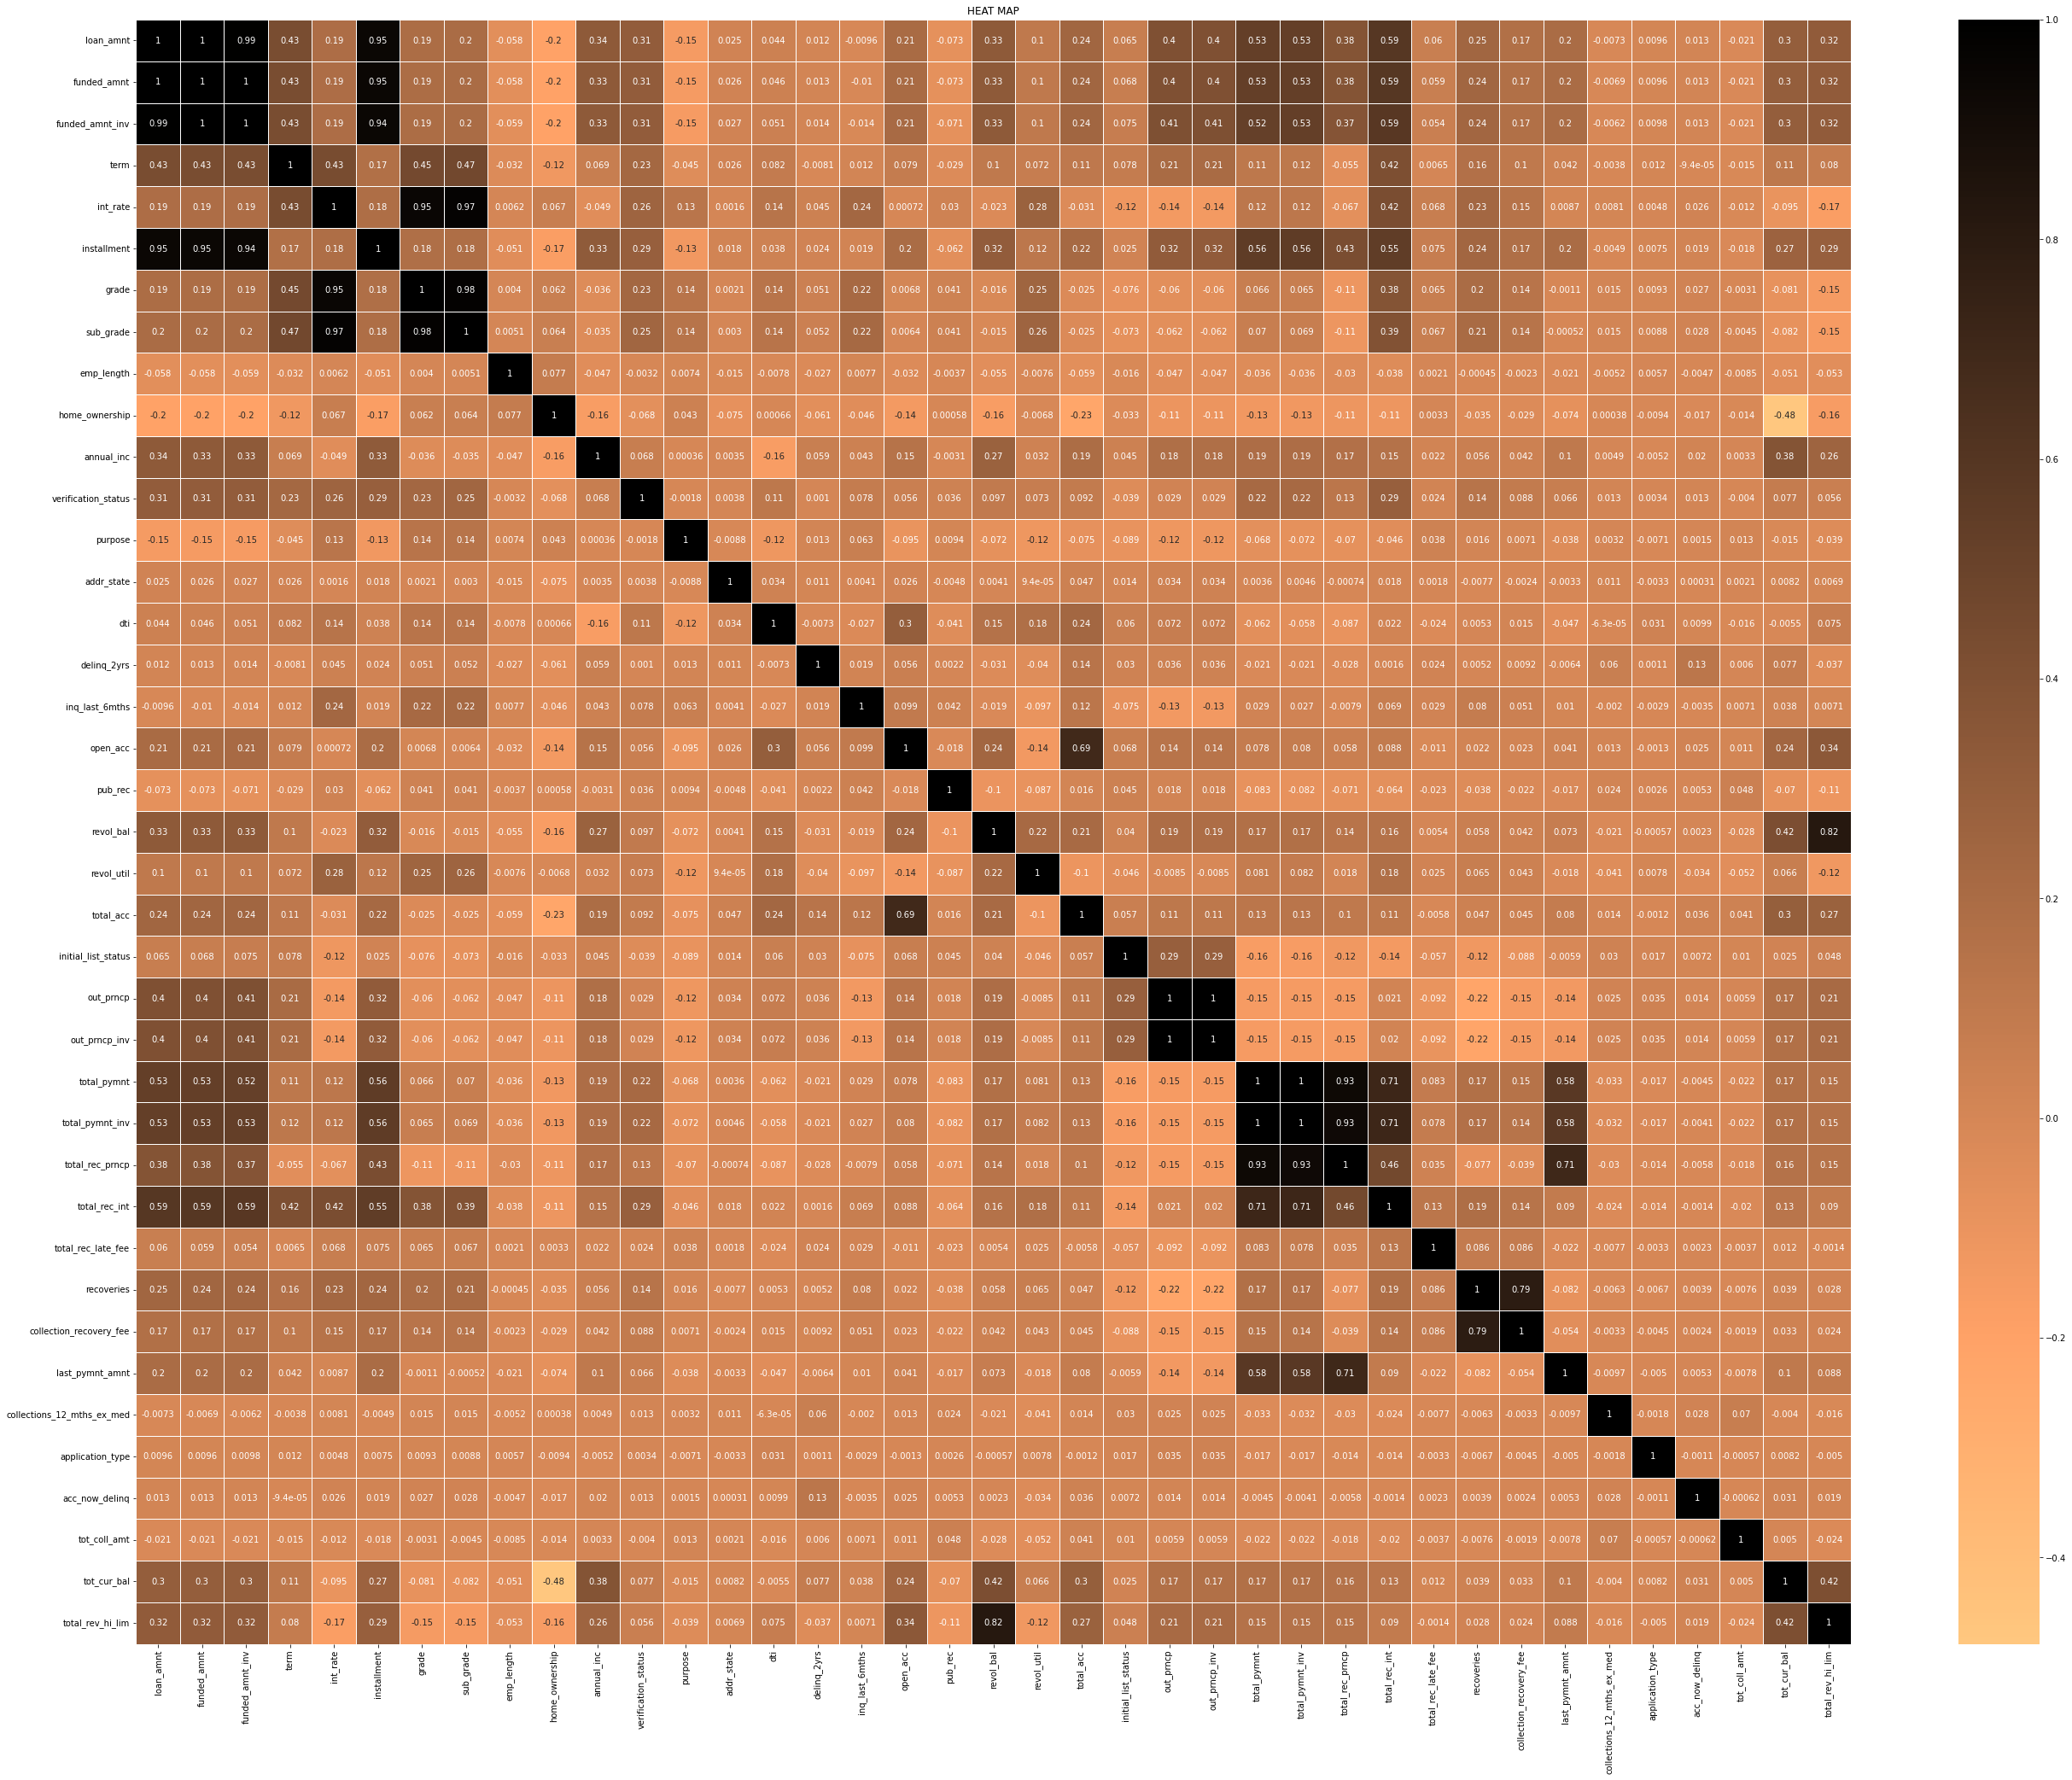

In [30]:
co=trainx.corr()
f=plt.figure(figsize=(45,35))
heatmap=sns.heatmap(co,linewidth=1,annot=True,cmap=plt.cm.copper_r)
plt.title('HEAT MAP')
plt.show()

In [31]:
def correlation(dataset,threshold):
    col_corr=set() #set of all names of correlated col
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
correlation(trainx,0.55) #this are the list of columns which are highly corelated

{'collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'sub_grade',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'}

In [33]:
#droping those high corelated columns from train data
trainx=trainx.drop(['collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'sub_grade',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'],axis=1)

In [34]:
#droping those high corelated columns from test data too
testx=testx.drop(['collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'sub_grade',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'],axis=1)

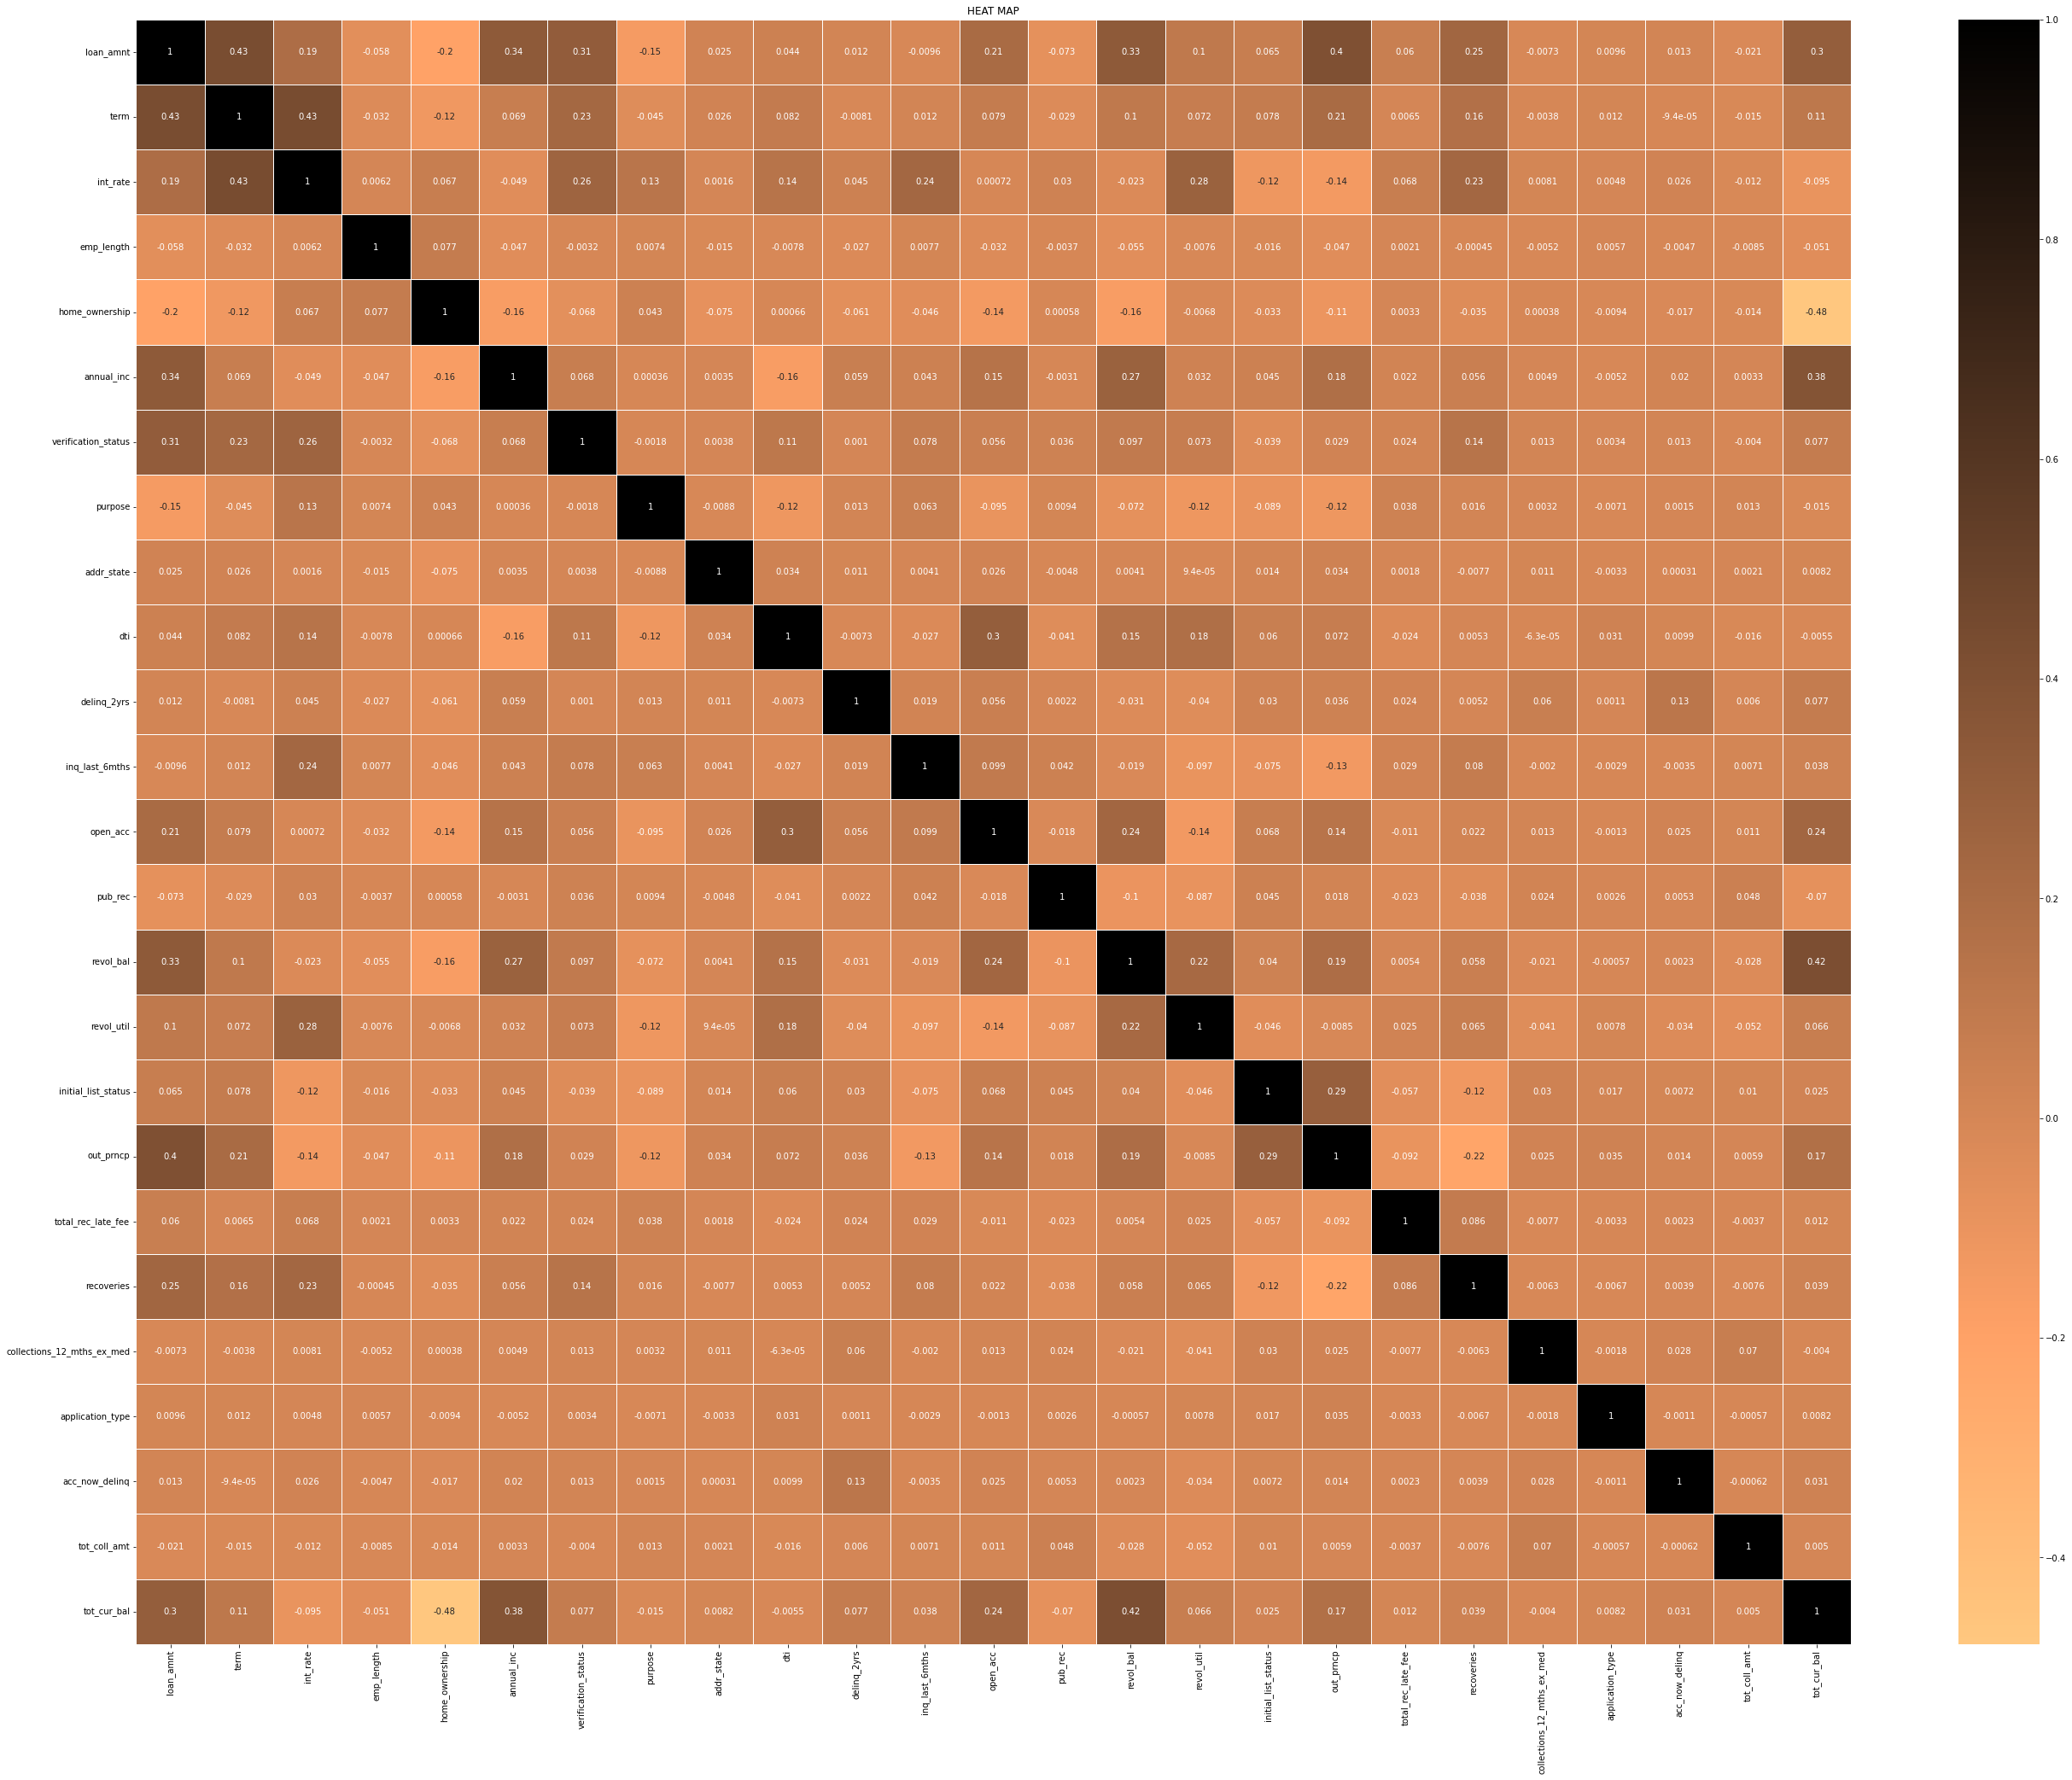

In [35]:
#result after correcting highly corelated columns
x=trainx.corr()
plt.figure(figsize=(45,35))
heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.copper_r)
plt.title('HEAT MAP')
plt.show()

In [36]:
#Now as our data is completly free from all the disturbances we can fit it into model

# RANDOM FOREST MODEL

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [38]:
rf.fit(trainx,trainy)

RandomForestClassifier()

In [39]:
pred=rf.predict(testx)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
pred_prob=rf.predict_proba(testx)
pred_prob

array([[0.98, 0.02],
       [0.96, 0.04],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.54, 0.46]])

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,testy)
cm

array([[55517,   348],
       [ 9332,  3281]], dtype=int64)

In [42]:
pred_accuracy=cm.diagonal().sum()/cm.sum()*100
pred_accuracy

85.86407313297701

In [43]:
from sklearn.metrics import classification_report
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     55865
           1       0.90      0.26      0.40     12613

    accuracy                           0.86     68478
   macro avg       0.88      0.63      0.66     68478
weighted avg       0.86      0.86      0.82     68478



# LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [45]:
lr.fit(trainx,trainy)

LogisticRegression()

In [46]:
lp=lr.predict(testx)
lp

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [47]:
m=confusion_matrix(lp,testy)
m

array([[52319,   314],
       [12530,  3315]], dtype=int64)

In [48]:
acc=m.diagonal().sum()/m.sum()*100
acc

81.24361108677239

In [49]:
from sklearn.metrics import classification_report
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     55865
           1       0.90      0.26      0.40     12613

    accuracy                           0.86     68478
   macro avg       0.88      0.63      0.66     68478
weighted avg       0.86      0.86      0.82     68478



# DECISION TREE

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [51]:
dt.fit(trainx,trainy)

DecisionTreeClassifier()

In [52]:
dp=dt.predict(testx)
dp

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [53]:
dm=confusion_matrix(dp,testy)
dm

array([[53995,   616],
       [10854,  3013]], dtype=int64)

In [54]:
dacc=dm.diagonal().sum()/dm.sum()*100
dacc

83.25009492099652

In [55]:
from sklearn.metrics import classification_report
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     55865
           1       0.90      0.26      0.40     12613

    accuracy                           0.86     68478
   macro avg       0.88      0.63      0.66     68478
weighted avg       0.86      0.86      0.82     68478



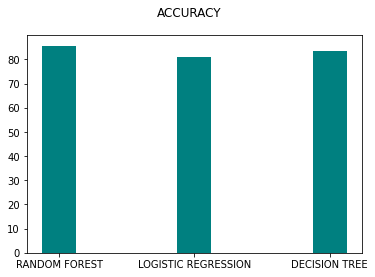

In [56]:
X=np.array(['RANDOM FOREST','LOGISTIC REGRESSION','DECISION TREE'])
Y=np.array([85.6260404801542,81.106340722567827,83.54215952568708])
plt.bar(X,Y,color='teal',width=0.25)
plt.suptitle('ACCURACY')
plt.show()